# ***MDC Women's Basketball Season 24-25***

#Upload the Data
Each CSV as a seperate dataframe

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
import statsmodels.api as sm

# Here are all the csvs for my Overal Season Stats
url0 = "https://raw.githubusercontent.com/SallyPosey/SportsAnalytics/refs/heads/main/BallControl.csv"
BallControl = pd.read_csv(url0)

url1 = "https://raw.githubusercontent.com/SallyPosey/SportsAnalytics/refs/heads/main/OpponentBallControl.csv"
OpponentBallControl = pd.read_csv(url1)

url2 = "https://raw.githubusercontent.com/SallyPosey/SportsAnalytics/refs/heads/main/Shooting.csv"
Shooting = pd.read_csv(url2)

url3 = "https://raw.githubusercontent.com/SallyPosey/SportsAnalytics/refs/heads/main/OpponentShooting.csv"
OpponentShooting = pd.read_csv(url3)

url4 = "https://raw.githubusercontent.com/SallyPosey/SportsAnalytics/refs/heads/main/Rebounding.csv"
Rebounding = pd.read_csv(url4)

url5 = "https://raw.githubusercontent.com/SallyPosey/SportsAnalytics/refs/heads/main/OpponentRebounding.csv"
OpponentRebounding = pd.read_csv(url5)

url6 = "https://raw.githubusercontent.com/SallyPosey/SportsAnalytics/refs/heads/main/PF_EFF.csv"
PF_EFF = pd.read_csv(url6)

url7 = "https://raw.githubusercontent.com/SallyPosey/SportsAnalytics/refs/heads/main/Opponent_PF_EFF.csv"
Opponent_PF_EFF = pd.read_csv(url7)



In [115]:
# Here is the csv for my PLayer season stats
player = pd.read_csv("https://raw.githubusercontent.com/SallyPosey/SportsAnalytics/refs/heads/main/PlayerStats.csv")

#Cleaning

## 1. Season Scores Dataframe

###Clean columns
-Example: add "OBC_" to titles of columns in OpponentBallControl

-Drop the 3 null games

-preview each to check work

-take columns with #-# format and convert to two new columns "made" and "attempted"

####Ball Control (Self)

In [116]:
#BallControl column
  #Add "BC_" prefix to columns
columns_to_rename = ['to', 'stl', 'blk', 'ast']
rename_dict = {col: f"BC_{col}" for col in columns_to_rename}
BallControl = BallControl.rename(columns=rename_dict)

  #Remove rows with any null values
BallControl.dropna(inplace=True)

BallControl.head()

,Date,Opponent,Score,BC_to,BC_stl,BC_blk,BC_ast
3,1-Nov,South Georgia Technical College,"L, 72-58",21,9,3,9
4,2-Nov,at Tallahassee State College,"W, 82-69",31,12,1,10
5,15-Nov,vs. Northwest Florida State College,"L, 80-58",24,15,6,13
6,16-Nov,vs. Western Wyoming Community College,"W, 101-87",19,5,5,19
7,22-Nov,vs. East Georgia State College,"W, 87-80",13,13,4,13


####Opponent Ball Control

In [117]:
#OpponentBallControl column
  #Add "OBC_" prefix to columns
columns_to_rename = ['to', 'stl', 'blk', 'ast']
rename_dict = {col: f"OBC_{col}" for col in columns_to_rename}
OpponentBallControl = OpponentBallControl.rename(columns=rename_dict)

  #Remove rows with any null values
OpponentBallControl.dropna(inplace=True)

OpponentBallControl.head()

,Date,Opponent,Score,OBC_to,OBC_stl,OBC_blk,OBC_ast
3,1-Nov,South Georgia Technical College,"L, 72-58",31,8,0,20
4,2-Nov,at Tallahassee State College,"W, 82-69",26,17,1,15
5,15-Nov,vs. Northwest Florida State College,"L, 80-58",21,12,4,23
6,16-Nov,vs. Western Wyoming Community College,"W, 101-87",15,11,2,19
7,22-Nov,vs. East Georgia State College,"W, 87-80",19,10,3,17


#### Rebounding (Self)

In [118]:
#Rebounding column
  #Add "R_" prefix to columns
columns_to_rename = ['off', 'def', 'reb', 'mrgn']
rename_dict = {col: f"R_{col}" for col in columns_to_rename}
Rebounding = Rebounding.rename(columns=rename_dict)

  #Remove rows with any null values
Rebounding.dropna(inplace=True)

Rebounding.head()

,Date,Opponent,Score,R_off,R_def,R_reb,R_mrgn
3,1-Nov,South Georgia Technical College,"L, 72-58",13,16,29,-15
4,2-Nov,at Tallahassee State College,"W, 82-69",19,25,44,15
5,15-Nov,vs. Northwest Florida State College,"L, 80-58",15,20,35,-8
6,16-Nov,vs. Western Wyoming Community College,"W, 101-87",14,29,43,13
7,22-Nov,vs. East Georgia State College,"W, 87-80",18,24,42,-10


####Opponent Rebounding

In [119]:
#OpponentRebounding column
  #Add "OR_" prefix to columns
columns_to_rename = ['off', 'def', 'reb', 'mrgn']
rename_dict = {col: f"OR_{col}" for col in columns_to_rename}
OpponentRebounding = OpponentRebounding.rename(columns=rename_dict)

  #Remove rows with any null values
OpponentRebounding.dropna(inplace=True)

OpponentRebounding.head()

,Date,Opponent,Score,OR_off,OR_def,OR_reb,OR_mrgn
3,1-Nov,South Georgia Technical College,"L, 72-58",15,29,44,-15
4,2-Nov,at Tallahassee State College,"W, 82-69",10,19,29,15
5,15-Nov,vs. Northwest Florida State College,"L, 80-58",17,26,43,-8
6,16-Nov,vs. Western Wyoming Community College,"W, 101-87",10,20,30,13
7,22-Nov,vs. East Georgia State College,"W, 87-80",17,35,52,-10


####Shooting

In [120]:
#Shooting column


# Assuming the first row contains the column headers
Shooting.columns = Shooting.iloc[0]  # Set the first row as headers
Shooting = Shooting[1:]  # Remove the first row from data

#Add "S_" prefix to column
columns_to_rename = ['fg', 'fg_pct', '3pt', '3pt_pct', 'ft', 'ft_pct']  # Select columns to rename (excluding the first column, likely 'Date')
rename_dict = {col: f"S_{col}" for col in columns_to_rename}  # Create rename dictionary
Shooting = Shooting.rename(columns=rename_dict)  # Rename columns

  #Remove rows with any null values
Shooting.dropna(inplace=True)


Shooting.head()  # Preview changes

,Date,Opponent,Score,S_fg,S_fg_pct,S_3pt,S_3pt_pct,S_ft,S_ft_pct,pts
1,Oct 15 #,at St. Thomas University,,-,-,-,-,-,-,-
2,Oct 19 #,at Barry University,,-,-,-,-,-,-,-
3,Oct 23 #,Ft. Lauderdale University,,-,-,-,-,-,-,-
4,Nov 1,South Georgia Technical College,"L, 72-58",21-39,53.8,1-3,33.3,15-22,68.2,58.0
5,Nov 2,at Tallahassee State College,"W, 82-69",35-56,62.5,2-4,50.0,10-14,71.4,82.0


In [121]:
# Remove rows with null values.  Null values are represented as '-' in this dataset
Shooting = Shooting[Shooting["pts"] != "-"]
# Display the updated dataframe
Shooting


,Date,Opponent,Score,S_fg,S_fg_pct,S_3pt,S_3pt_pct,S_ft,S_ft_pct,pts
4,Nov 1,South Georgia Technical College,"L, 72-58",21-39,53.8,1-3,33.3,15-22,68.2,58.0
5,Nov 2,at Tallahassee State College,"W, 82-69",35-56,62.5,2-4,50.0,10-14,71.4,82.0
6,Nov 15,vs. Northwest Florida State College,"L, 80-58",25-65,38.5,5-17,29.4,3-7,42.9,58.0
7,Nov 16,vs. Western Wyoming Community College,"W, 101-87",42-74,56.8,9-17,52.9,8-11,72.7,101.0
8,Nov 22,vs. East Georgia State College,"W, 87-80",26-67,38.8,6-22,27.3,29-44,65.9,87.0
9,Nov 23,at DME Academy,"W, 77-54",30-73,41.1,7-22,31.8,10-13,76.9,77.0
10,Dec 2,Hillsborough Community College,"W, 85-75",31-72,43.1,5-21,23.8,18-24,75.0,85.0
11,Dec 7,at Santa Fe College,"W, 83-77",31-58,53.4,6-17,35.3,15-20,75.0,83.0
12,Dec 9,St. Petersburg College,"W, 97-60",40-86,46.5,11-28,39.3,6-13,46.2,97.0
13,Dec 14,Eastern Florida State College,"L, 56-49",18-72,25.0,2-14,14.3,11-20,55.0,49.0


**Split** free throws into two columns (attempted and made)

In [122]:
#Shooting column S_ft

Shooting[['S_ft_m', 'S_ft_a']] = Shooting['S_ft'].str.split('-', expand=True).astype(int)  # Split and convert to int

In [123]:
#Shooting column S_3pt

Shooting[['S_3pt_m', 'S_3pt_a']] = Shooting['S_3pt'].str.split('-', expand=True).astype(int)  # Split and convert to int

In [124]:
Shooting.head()

,Date,Opponent,Score,S_fg,S_fg_pct,S_3pt,S_3pt_pct,S_ft,S_ft_pct,pts,S_ft_m,S_ft_a,S_3pt_m,S_3pt_a
4,Nov 1,South Georgia Technical College,"L, 72-58",21-39,53.8,1-3,33.3,15-22,68.2,58.0,15,22,1,3
5,Nov 2,at Tallahassee State College,"W, 82-69",35-56,62.5,2-4,50.0,10-14,71.4,82.0,10,14,2,4
6,Nov 15,vs. Northwest Florida State College,"L, 80-58",25-65,38.5,5-17,29.4,3-7,42.9,58.0,3,7,5,17
7,Nov 16,vs. Western Wyoming Community College,"W, 101-87",42-74,56.8,9-17,52.9,8-11,72.7,101.0,8,11,9,17
8,Nov 22,vs. East Georgia State College,"W, 87-80",26-67,38.8,6-22,27.3,29-44,65.9,87.0,29,44,6,22


####Opponent Shooting

In [125]:
#OpponentShooting column


# Assuming the first row contains the column headers
OpponentShooting.columns = OpponentShooting.iloc[0] # Set the first row as headers
OpponentShooting = OpponentShooting[1:] # Remove the first row from data

#Add "OS_" prefix to columns
columns_to_rename = ['fg', 'fg_pct', '3pt', '3pt_pct', 'pts' ]  # Select columns to rename
rename_dict = {col: f"OS_{col}" for col in columns_to_rename} # Create rename dictionary
OpponentShooting = OpponentShooting.rename(columns=rename_dict) # Rename columns

  #Remove rows with any null values
OpponentShooting.dropna(inplace=True)

# Remove the 'Date' column
OpponentShooting = OpponentShooting.drop(columns=['Date'])

OpponentShooting.head() # Preview changes

,Opponent,Score,OS_fg,OS_fg_pct,OS_3pt,OS_3pt_pct,OS_pts
1,at St. Thomas University,,-,-,-,-,-
2,at Barry University,,-,-,-,-,-
3,Ft. Lauderdale University,,-,-,-,-,-
4,South Georgia Technical College,"L, 72-58",27-48,56.3,7-19,36.8,72.0
5,at Tallahassee State College,"W, 82-69",22-65,33.8,6-21,28.6,69.0


In [126]:
# Remove rows with null values.  Null values are represented as '-' in this dataset
OpponentShooting = OpponentShooting[OpponentShooting["OS_pts"] != "-"]
# Display the updated dataframe
OpponentShooting


,Opponent,Score,OS_fg,OS_fg_pct,OS_3pt,OS_3pt_pct,OS_pts
4,South Georgia Technical College,"L, 72-58",27-48,56.3,7-19,36.8,72.0
5,at Tallahassee State College,"W, 82-69",22-65,33.8,6-21,28.6,69.0
6,vs. Northwest Florida State College,"L, 80-58",30-63,47.6,5-14,35.7,80.0
7,vs. Western Wyoming Community College,"W, 101-87",35-70,50.0,9-17,52.9,87.0
8,vs. East Georgia State College,"W, 87-80",32-73,43.8,10-30,33.3,80.0
9,at DME Academy,"W, 77-54",22-68,32.4,6-22,27.3,54.0
10,Hillsborough Community College,"W, 85-75",29-78,37.2,9-33,27.3,75.0
11,at Santa Fe College,"W, 83-77",31-72,43.1,4-21,19.0,77.0
12,St. Petersburg College,"W, 97-60",24-54,44.4,5-10,50.0,60.0
13,Eastern Florida State College,"L, 56-49",19-56,33.9,3-12,25.0,56.0


In [127]:
#Shooting column OS_fg

OpponentShooting[['OS_fg_m', 'OS_fg_a']] = OpponentShooting['OS_fg'].str.split('-', expand=True).astype(int)  # Split and convert to int

In [128]:
#Shooting column OS_3pt

OpponentShooting[['OS_3pt_m', 'OS_3pt_a']] = OpponentShooting['OS_3pt'].str.split('-', expand=True).astype(int)  # Split and convert to int

In [129]:
OpponentShooting.head()

,Opponent,Score,OS_fg,OS_fg_pct,OS_3pt,OS_3pt_pct,OS_pts,OS_fg_m,OS_fg_a,OS_3pt_m,OS_3pt_a
4,South Georgia Technical College,"L, 72-58",27-48,56.3,7-19,36.8,72.0,27,48,7,19
5,at Tallahassee State College,"W, 82-69",22-65,33.8,6-21,28.6,69.0,22,65,6,21
6,vs. Northwest Florida State College,"L, 80-58",30-63,47.6,5-14,35.7,80.0,30,63,5,14
7,vs. Western Wyoming Community College,"W, 101-87",35-70,50.0,9-17,52.9,87.0,35,70,9,17
8,vs. East Georgia State College,"W, 87-80",32-73,43.8,10-30,33.3,80.0,32,73,10,30


####Performance Efficiency (Self)

In [130]:
#PF_EFF column
  #Add "P_" prefix to columns
columns_to_rename = ['pf', 'off eff', 'net eff']
rename_dict = {col: f"P_{col}" for col in columns_to_rename}
PF_EFF = PF_EFF.rename(columns=rename_dict)

  # Remove rows with any null values
PF_EFF.dropna(inplace=True)

PF_EFF.head()

,Date,Opponent,Score,P_pf,P_off eff,P_net eff
3,1-Nov,South Georgia Technical College,"L, 72-58",17,1,0.04
4,2-Nov,at Tallahassee State College,"W, 82-69",19,1.093,0.375
5,15-Nov,vs. Northwest Florida State College,"L, 80-58",19,0.748,-0.284
6,16-Nov,vs. Western Wyoming Community College,"W, 101-87",12,1.195,0.128
7,22-Nov,vs. East Georgia State College,"W, 87-80",18,1.036,0.042


####Opponent Performance Efficiency

In [131]:
#Opponent_PF_EFF column
  #Add "P_" prefix to columns
columns_to_rename = ['pf', 'def eff', 'net eff']
rename_dict = {col: f"OP_{col}" for col in columns_to_rename}
Opponent_PF_EFF = Opponent_PF_EFF.rename(columns=rename_dict)

  # Remove rows with any null values
Opponent_PF_EFF.dropna(inplace=True)

Opponent_PF_EFF.head()

,Date,Opponent,Score,OP_pf,OP_def eff,OP_net eff
3,1-Nov,South Georgia Technical College,"L, 72-58",24,0.96,0.04
4,2-Nov,at Tallahassee State College,"W, 82-69",0,0.719,0.375
5,15-Nov,vs. Northwest Florida State College,"L, 80-58",10,1.032,-0.284
6,16-Nov,vs. Western Wyoming Community College,"W, 101-87",16,1.067,0.128
7,22-Nov,vs. East Georgia State College,"W, 87-80",34,0.994,0.042


###Concatenate all the columns, without duplicate columns
*   Left join
*   Merge on Score column


In [132]:
dataframes_to_modify = [OpponentBallControl, Shooting, OpponentShooting, Rebounding, OpponentRebounding, PF_EFF, Opponent_PF_EFF]

for df in dataframes_to_modify:
    if 'Opponent' in df.columns:
        df.drop(columns=['Opponent'], inplace=True)
    if 'Date' in df.columns:
        df.drop(columns=['Date'], inplace=True)

In [133]:
import pandas as pd
from functools import reduce

# List of your DataFrames
dfs = [BallControl, OpponentBallControl, Shooting, OpponentShooting,
       Rebounding, OpponentRebounding, PF_EFF, Opponent_PF_EFF]

# Merge all on the 'Score' column using outer join
merged_df = reduce(lambda left, right: pd.merge(left, right, on="Score", how="outer"), dfs)

# Drop any duplicate rows (if exact duplicates exist)
merged_df = merged_df.drop_duplicates()


In [134]:
# prompt: how many rows in merged_df

print(len(merged_df))


285


In [135]:
#drop exact duplicate rows if any
merged_df = merged_df.drop_duplicates()
print(len(merged_df))

285


In [136]:
# prompt: drop any rows that share identical information for the Date column

# Assuming 'Date' is a column in your merged_df
merged_df = merged_df.drop_duplicates(subset=['Date'])
print(len(merged_df))


31


### Modifying the Date column
*   Adding the year
*   Changing to datetime type

In [137]:
import pandas as pd

# Assuming your DataFrame is named merged_df

def add_year(date_str):
    """Adds the appropriate year (2024 or 2025) to the date string."""
    if "Nov" in date_str or "Dec" in date_str:
        return date_str + "-2024"
    else:
        return date_str + "-2025"

# Apply the function to the 'Date' column
merged_df['Date'] = merged_df['Date'].apply(add_year)

# Convert the 'Date' column to datetime objects
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%d-%b-%Y')


merged_df.head(10)

,Date,Opponent,Score,BC_to,BC_stl,BC_blk,BC_ast,OBC_to,OBC_stl,OBC_blk,...,OR_off,OR_def,OR_reb,OR_mrgn,P_pf,P_off eff,P_net eff,OP_pf,OP_def eff,OP_net eff
0,2025-02-01,at Hillsborough Community College,"L, 105-100",26,11,5,20,21,15,2,...,22,28,50,16,16,0.901,-0.067,16,0.968,-0.067
1,2024-12-14,Eastern Florida State College,"L, 56-49",17,10,6,11,21,8,2,...,8,36,44,7,19,0.645,-0.078,20,0.723,-0.078
2,2024-11-01,South Georgia Technical College,"L, 72-58",21,9,3,9,31,8,0,...,15,29,44,-15,17,1,0.04,24,0.96,0.04
3,2025-02-26,at Florida Southwestern State College,"L, 74-60",12,8,2,7,14,10,1,...,18,27,45,-11,14,0.87,-0.203,13,1.072,-0.203
4,2025-03-12,vs. Chipola College,"L, 74-70",12,12,6,15,18,7,3,...,21,38,59,-2,18,0.875,-0.027,11,0.902,-0.027
5,2024-12-30,at Pensacola State College,"L, 76-74",22,12,8,12,12,6,0,...,7,24,31,26,22,0.775,0.03,26,0.745,0.03
6,2025-01-03,vs. Bryant & Stratton College (VA),"L, 77-75",14,12,2,13,12,15,0,...,19,20,39,-10,19,0.932,-0.209,16,1.141,-0.209
7,2024-11-15,vs. Northwest Florida State College,"L, 80-58",24,15,6,13,21,12,4,...,17,26,43,-8,19,0.748,-0.284,10,1.032,-0.284
8,2025-01-22,at Eastern Florida State College,"L, 82-68",22,7,0,10,17,13,1,...,13,30,43,-5,13,0.84,-0.167,13,1.006,-0.167
9,2024-12-16,at Florida Southwestern State College,"L, 86-70",15,7,4,11,21,11,3,...,18,30,48,-20,21,0.915,-0.195,13,1.11,-0.195


###Creating New Columns
*   Extract PontsGiven and PointsScored from the Score column and make those two new columns
*   Create a Binary "Wins" column based on Score


In [138]:
#-------------------------------------------------------------------------------------------------------------------------------------------
#Creating the 'Win' Column and modifying the Score column
merged_df['Win'] = merged_df['Score'].str[0]
merged_df['Score'] = merged_df['Score'].str[2:]

#mapping on win column
merged_df['Win'] = merged_df['Win'].map({'L': 0, 'W': 1})
#----------------------------------------------------------------------------------------------------------------------------------------------------
# Extract PointsScored and PointsGiven from 'Score' column
merged_df[['PointsScored', 'PointsGiven']] = merged_df['Score'].str.split('-', expand=True).astype(int)
#----------------------------------------------------------------------------------------------------------------------------------------------------
# Extract PointsScored and PointsGiven from 'Score' column
merged_df[['PointsScored', 'PointsGiven']] = merged_df['Score'].str.split('-', expand=True).astype(int)
#------------------------------------------------------------------------------------------------------------------------------------------------

#----------------------------------------------------------------------------------------------------------


merged_df.head(20)


,Date,Opponent,Score,BC_to,BC_stl,BC_blk,BC_ast,OBC_to,OBC_stl,OBC_blk,...,OR_mrgn,P_pf,P_off eff,P_net eff,OP_pf,OP_def eff,OP_net eff,Win,PointsScored,PointsGiven
0,2025-02-01,at Hillsborough Community College,105-100,26,11,5,20,21,15,2,...,16,16,0.901,-0.067,16,0.968,-0.067,0,105,100
1,2024-12-14,Eastern Florida State College,56-49,17,10,6,11,21,8,2,...,7,19,0.645,-0.078,20,0.723,-0.078,0,56,49
2,2024-11-01,South Georgia Technical College,72-58,21,9,3,9,31,8,0,...,-15,17,1,0.04,24,0.96,0.04,0,72,58
3,2025-02-26,at Florida Southwestern State College,74-60,12,8,2,7,14,10,1,...,-11,14,0.87,-0.203,13,1.072,-0.203,0,74,60
4,2025-03-12,vs. Chipola College,74-70,12,12,6,15,18,7,3,...,-2,18,0.875,-0.027,11,0.902,-0.027,0,74,70
5,2024-12-30,at Pensacola State College,76-74,22,12,8,12,12,6,0,...,26,22,0.775,0.03,26,0.745,0.03,0,76,74
6,2025-01-03,vs. Bryant & Stratton College (VA),77-75,14,12,2,13,12,15,0,...,-10,19,0.932,-0.209,16,1.141,-0.209,0,77,75
7,2024-11-15,vs. Northwest Florida State College,80-58,24,15,6,13,21,12,4,...,-8,19,0.748,-0.284,10,1.032,-0.284,0,80,58
8,2025-01-22,at Eastern Florida State College,82-68,22,7,0,10,17,13,1,...,-5,13,0.84,-0.167,13,1.006,-0.167,0,82,68
9,2024-12-16,at Florida Southwestern State College,86-70,15,7,4,11,21,11,3,...,-20,21,0.915,-0.195,13,1.11,-0.195,0,86,70


###Check datatypes

In [139]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 0 to 284
Data columns (total 48 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          31 non-null     datetime64[ns]
 1   Opponent      31 non-null     object        
 2   Score         31 non-null     object        
 3   BC_to         31 non-null     object        
 4   BC_stl        31 non-null     object        
 5   BC_blk        31 non-null     object        
 6   BC_ast        31 non-null     object        
 7   OBC_to        31 non-null     object        
 8   OBC_stl       31 non-null     object        
 9   OBC_blk       31 non-null     object        
 10  OBC_ast       31 non-null     object        
 11  S_fg          31 non-null     object        
 12  S_fg_pct      31 non-null     object        
 13  S_3pt         31 non-null     object        
 14  S_3pt_pct     31 non-null     object        
 15  S_ft          31 non-null     object        
 

###Toubleshooting - Datatypes got messed up
*   Changing numerical columns dataypes to INT or FLOAT
*   First I will need to look at what columns are causing me problems with converting

In [140]:
# Display unique values for problematic columns
problematic_columns = ['S_fg', 'OS_fg', 'OS_fg_pct', 'OS_3pt_pct']
for column in problematic_columns:
    unique_values = merged_df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("-" * 20)  # Separator for better readability

Unique values in column 'S_fg':
['39-103' '18-72' '21-39' '26-63' '28-88' '25-78' '28-69' '25-65' '28-65'
 '27-67' '42-74' '42-85' '53-106' '25-76' '32-79' '30-73' '26-77' '31-78'
 '33-83' '35-56' '31-58' '31-72' '35-79' '26-67' '34-61' '39-77' '27-79'
 '38-70' '40-86' '35-81']
--------------------
Unique values in column 'OS_fg':
['37-101' '19-56' '27-48' '27-66' '28-75' '24-81' '28-66' '30-63' '34-70'
 '33-64' '35-70' '32-84' '25-64' '23-68' '19-65' '22-68' '26-63' '25-70'
 '18-65' '22-65' '31-72' '29-78' '25-68' '32-73' '23-64' '31-64' '35-72'
 '29-74' '24-54' '20-63']
--------------------
Unique values in column 'OS_fg_pct':
['36.6' '33.9' '56.3' '40.9' '37.3' '29.6' '42.4' '47.6' '48.6' '51.6'
 '50.0' '38.1' '39.1' '33.8' '29.2' '32.4' '41.3' '35.7' '27.7' '43.1'
 '37.2' '36.8' '43.8' '35.9' '48.4' '39.2' '44.4' '31.7']
--------------------
Unique values in column 'OS_3pt_pct':
['28.6' '25.0' '36.8' '45.8' '32.0' '13.9' '38.1' '35.7' '33.3' '31.6'
 '52.9' '23.8' '30.0' '7.7' '22.7

####The columns OS_fg_pct and OS_3pt_pct are decimal numbers, yet resisting conversion to FLOAT
*   This is possibly due to spaces, let me handle that

In [141]:
for column in ['OS_fg_pct', 'OS_3pt_pct']:
    # Replace any non-numeric characters (except for '.') with empty string
    merged_df[column] = merged_df[column].str.replace('[^0-9.]', '', regex=True)
    # Convert to float
    merged_df[column] = pd.to_numeric(merged_df[column], errors='coerce').astype(float)

 # Display unique values for OS_fg_pct and OS_3pt_pct columns
problematic_columns = ['OS_fg_pct', 'OS_3pt_pct']
for column in problematic_columns:
    unique_values = merged_df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("-" * 20)  # Separator for better readability

Unique values in column 'OS_fg_pct':
[36.6 33.9 56.3 40.9 37.3 29.6 42.4 47.6 48.6 51.6 50.  38.1 39.1 33.8
 29.2 32.4 41.3 35.7 27.7 43.1 37.2 36.8 43.8 35.9 48.4 39.2 44.4 31.7]
--------------------
Unique values in column 'OS_3pt_pct':
[28.6 25.  36.8 45.8 32.  13.9 38.1 35.7 33.3 31.6 52.9 23.8 30.   7.7
 22.7 27.3 10.  28.  20.  19.  37.5 50.  14.3]
--------------------


####Let me try again to convert the remaining singular numerica columns to INT or FLOAT

In [142]:
for col in merged_df.columns:
    if col not in ['PointsGiven', 'PointsScored', 'Win', 'OS_3pt_pct', 'OS_fg_pct', 'Date', 'Opponent', 'Score', 'S_fg', 'OS_fg', 'S_3pt', 'S_ft', 'OS_3pt']:
        try:
            # Attempt to convert to int first
            merged_df[col] = merged_df[col].astype(int)
        except ValueError:
            # If int conversion fails, try float
            try:
                merged_df[col] = merged_df[col].astype(float)
            except ValueError:
                # If both fail, it could be a column with mixed types or other issues
                # Handle it appropriately (e.g., investigate further, drop the column, etc.)
                print(f"Warning: Could not convert column '{col}' to int or float.")

In [143]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 0 to 284
Data columns (total 48 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          31 non-null     datetime64[ns]
 1   Opponent      31 non-null     object        
 2   Score         31 non-null     object        
 3   BC_to         31 non-null     int64         
 4   BC_stl        31 non-null     int64         
 5   BC_blk        31 non-null     int64         
 6   BC_ast        31 non-null     int64         
 7   OBC_to        31 non-null     int64         
 8   OBC_stl       31 non-null     int64         
 9   OBC_blk       31 non-null     int64         
 10  OBC_ast       31 non-null     int64         
 11  S_fg          31 non-null     object        
 12  S_fg_pct      31 non-null     float64       
 13  S_3pt         31 non-null     object        
 14  S_3pt_pct     31 non-null     float64       
 15  S_ft          31 non-null     object        
 

###Save new dataframe as a CSV and save to GitHub


In [144]:
# Save DataFrame to CSV
csv_file_path = "merged_data.csv"  # Choose a file name
merged_df.to_csv(csv_file_path, index=False)  # Save to CSV, index=False to exclude index
print(f"DataFrame saved to: {csv_file_path}")

DataFrame saved to: merged_data.csv


## 2. Players Scores Dataframe

In [145]:
player.head()

,No,Player,T_GP,T_GS,T_MIN,T_AVG,T_FG,T_FGA,T_PCT,3F3,...,A/G,TO,TO/G,A/TO,BLK,BLK/G,STL,STL/G,PTS,AVG.1
0,15,Shameir Quimby......,31,30,795,25.6,214,496,48.6,2,...,4.4,72,2.3,1.9,8,0.3,81,2.6,597,19.3
1,15,Conference Only.....,18,18,553,30.7,126,297,42.4,1,...,4.2,42,2.3,1.8,6,0.3,43,2.4,325,18.1
2,23,Clearia Peterson....,31,31,723,23.3,231,477,48.4,9,...,1.5,84,2.7,0.6,24,0.8,47,1.5,560,18.1
3,23,Conference Only.....,18,18,517,28.7,147,302,48.7,7,...,1.3,47,2.6,0.5,12,0.7,33,1.8,353,19.6
4,21,Kiara Harris........,31,31,774,25.0,155,389,39.8,98,...,3.9,97,3.1,1.2,6,0.2,91,2.9,465,15.0


#Exploratory Data Analysis

*   Perform an EDA to understand the distribution of features and visualize relationships between features and the target variable.

*   Visualize the distribution of each feature using histograms or boxplots.

*   Create a correlation matrix to identify multicollinearity between features.

*   Create Logistic Regression Model to predict Wins

*   Evaluate Model and Explore Insights



## Glossary

###Ball Control (BC) & Opponent Ball Control (OBC)
*   BC_to: Turnovers committed by the team (Ball Control Turnovers)

*   BC_stl: Steals made by the team

*   BC_blk: Blocks made by the team

*   BC_ast: Assists made by the team

*   OBC_to: Turnovers committed by the opponent

*   OBC_stl: Steals made by the opponent

*   OBC_blk: Blocks made by the opponent

*   OBC_ast: Assists made by the opponent

###Shooting Stats (Self = S_, Opponent = OS_)
*   S_fg: Field goals made by the team

*   S_fg_pct: Team field goal percentage

*   S_3pt: Three-point field goals made

*   S_3pt_pct: Three-point percentage

*   S_ft: Free throws made

*   S_ft_pct: Free throw percentage

*   pts: Total points scored by the team

*   OS_fg: Field goals made by opponent

*   OS_fg_pct: Opponent field goal percentage

*   OS_3pt: Opponent three-pointers made

*   OS_3pt_pct: Opponent three-point percentage

*   OS_pts: Opponent total points

###Rebounds (R_ = Team, OR_ = Opponent)
*   R_off: Team offensive rebounds

*   R_def: Team defensive rebounds

*   R_reb: Total team rebounds

*   R_mrgn: Rebounding margin (team rebounds - opponent rebounds)

*   OR_off: Opponent offensive rebounds

*   OR_def: Opponent defensive rebounds

*   OR_reb: Opponent total rebounds

*   OR_mrgn: Opponent rebounding margin

###Fouls and Efficiency
*   P_pf: Personal fouls committed by the team

*   P_off eff: Team offensive efficiency (points per possession)

*   P_net eff: Team net efficiency (offensive eff - defensive eff)

*   OP_pf: Personal fouls committed by opponent

*   OP_def eff: Opponent defensive efficiency

*   OP_net eff: Opponent net efficiency

## 1. Distribution of Features / Split the Data

###Features for Model A:

*   field goal percentage - (S_fg_pct)
*   turn overs ------------------------(BC_to)
*   three pointers made ----(S_3pt_m)
*   steals ------------------------------(BC_stl)
*   total rebounds ----------------- (R_reb)
*   free throw percentage - (S_ft_pct)

###Features for Model B:
*   field goal percentage - (S_fg_pct)
*   turn overs ------------------------(BC_to)
*   three pointer percentage ----(S_3pt_pct)
*   steals ------------------------------(BC_stl)
*   total rebounds ----------------- (R_reb)
*   free throw percentage - (S_ft_pct)

In [146]:
#Split the data Model A
X = merged_df[['S_fg_pct', 'BC_to', 'S_3pt_m', 'BC_stl', 'R_reb', 'S_ft_pct']]
y = merged_df['Win']

In [147]:
#Split the data Model B
X2 = merged_df[['S_fg_pct', 'BC_to', 'S_3pt_pct', 'BC_stl', 'R_reb', 'S_ft_pct']]
y = merged_df['Win']

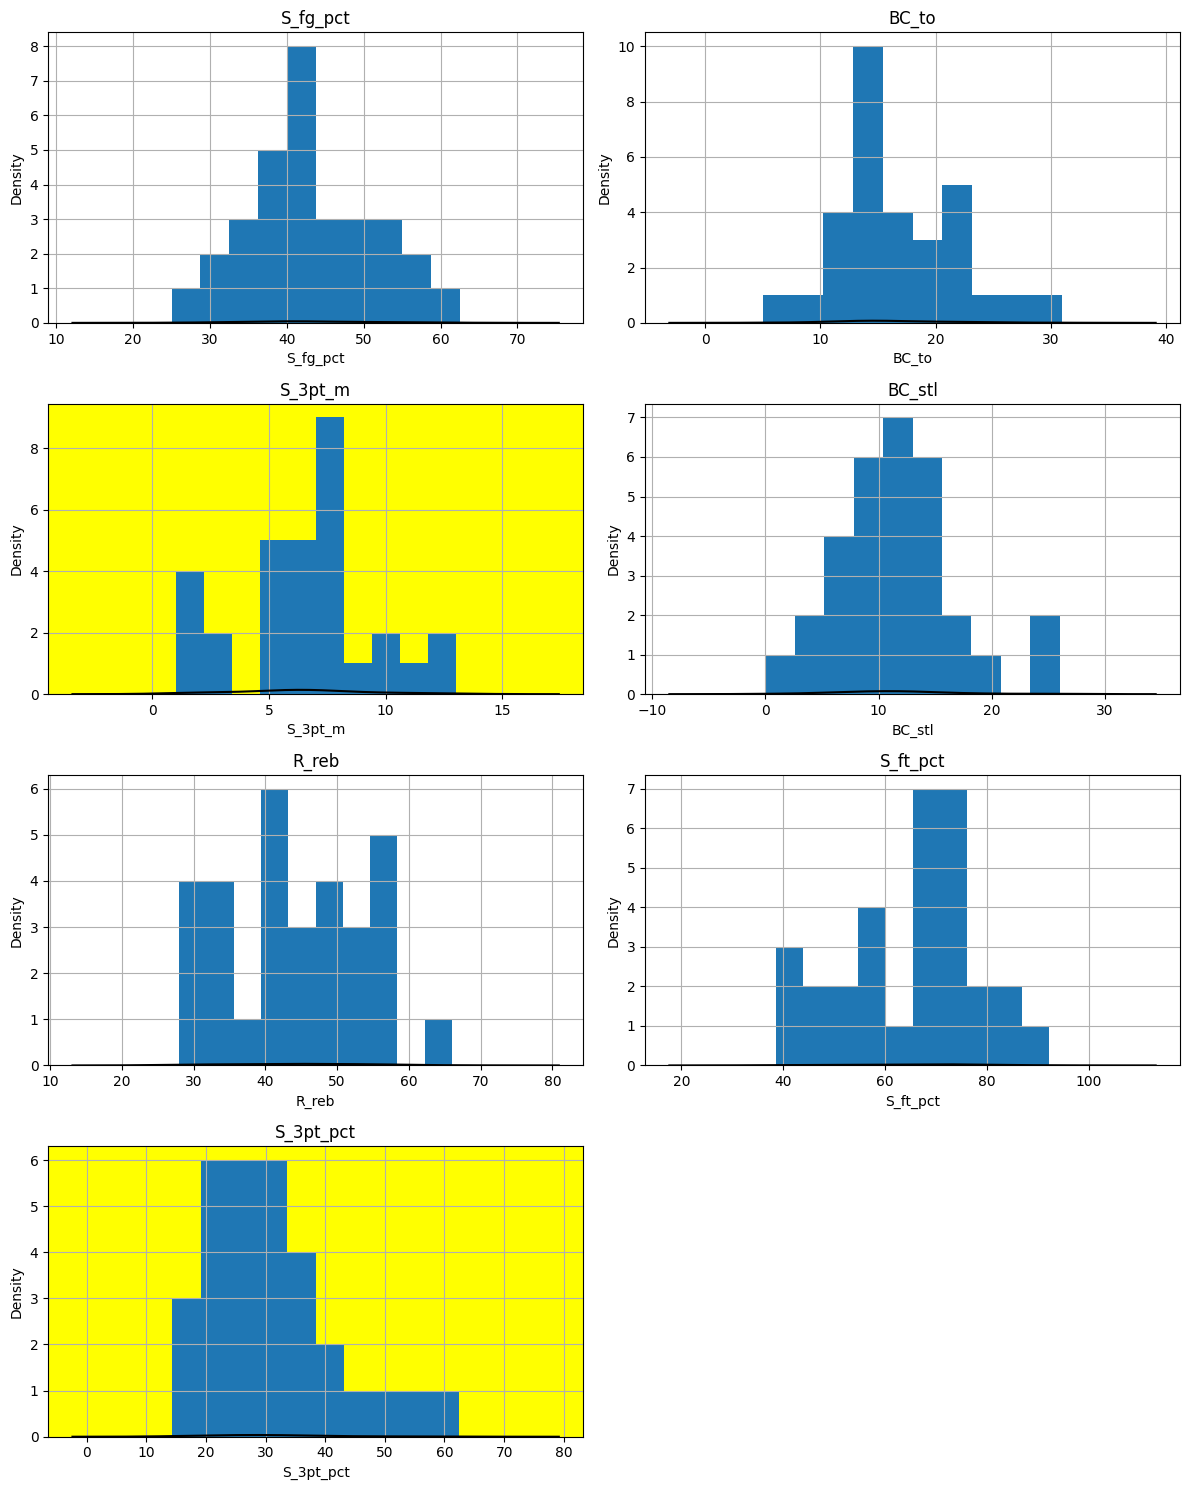

In [148]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate total number of plots
num_plots = len(X.columns) + 1  # +1 for S_3pt_pct

# Calculate number of rows and columns for grid
num_cols = 2  # 2-column grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate rows, ensuring enough space

# Create subplots with grid layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 15))

# Flatten the axes array for easier indexing
axes = axes.flatten()

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns  # Import seaborn for kdeplot

# ... (rest of your code for calculating num_plots, num_cols, num_rows, and creating subplots) ...

# Plot histograms for features in X
for i, col in enumerate(X.columns):
    X[col].hist(ax=axes[i])
    axes[i].set_title(col)
    if col == 'S_3pt_m':
        axes[i].patch.set_facecolor('yellow')
    # Fit and plot the KDE curve
    sns.kdeplot(X[col], ax=axes[i], color="black")  # Add KDE curve


# Plot S_3pt_pct in the second to last subplot
X2['S_3pt_pct'].hist(ax=axes[-2])
axes[-2].set_title('S_3pt_pct')
axes[-2].patch.set_facecolor('yellow')  # Highlight S_3pt_pct
# Fit and plot the KDE curve for S_3pt_pct
sns.kdeplot(X2['S_3pt_pct'], ax=axes[-2], color="black")

# Plot S_3pt_m in the last subplot (if not already highlighted)
if 'S_3pt_m' not in X.columns:
    X['S_3pt_m'].hist(ax=axes[-1])
    axes[-1].set_title('S_3pt_m')
    axes[-1].patch.set_facecolor('yellow')
# Fit and plot the KDE curve for S_3pt_m (if not already plotted)
if 'S_3pt_m' not in X.columns:
    sns.kdeplot(X['S_3pt_m'], ax=axes[-1], color="black")

# Hide any unused subplots to avoid repetition
for i in range(num_plots, len(axes)):
    axes[i].set_visible(False)  # Set unused subplots to invisible

plt.tight_layout()  # Adjust spacing
plt.show()

##2. Correlation Matrix

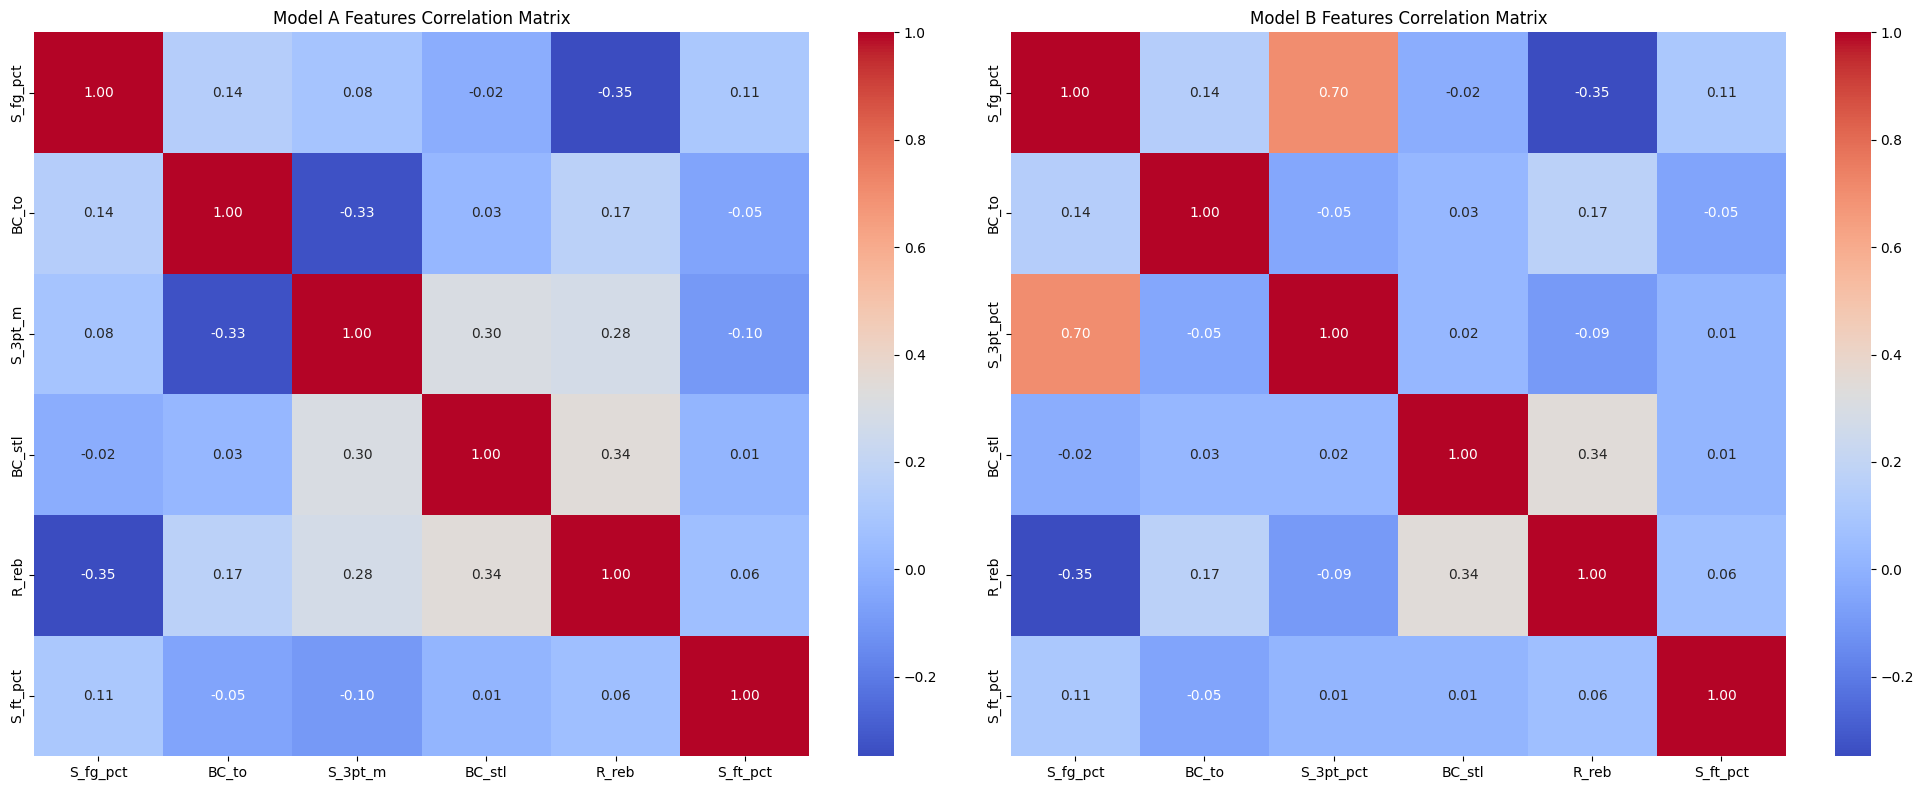

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrices
correlation_matrix_X = X.corr()
correlation_matrix_X2 = X2.corr()

# Create subplots for side-by-side display
fig, axes = plt.subplots(1, 2, figsize=(20, 8))  # 1 row, 2 columns

# Plot Model A correlation matrix
sns.heatmap(correlation_matrix_X, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title('Model A Features Correlation Matrix')

# Plot Model B correlation matrix
sns.heatmap(correlation_matrix_X2, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1])
axes[1].set_title('Model B Features Correlation Matrix')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

##3. RFE (Recursive Feature Elimiation) To Visualize Feature Importance

<ipython-input-150-4fdf00f79cd6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['S_3pt_pct'] = X2['S_3pt_pct']


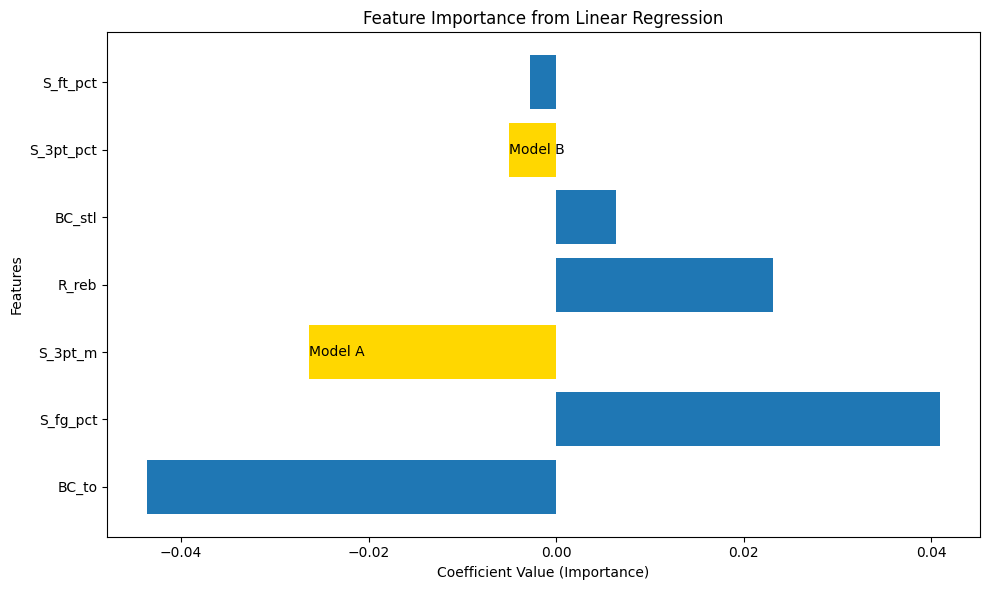

In [150]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # Import pandas for DataFrame handling
from sklearn.linear_model import LinearRegression

# Assuming X and X2 are your DataFrames
# Add S_3pt_pct to X
X['S_3pt_pct'] = X2['S_3pt_pct']

# Create and fit the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Get feature names and coefficients
feature_names = X.columns
coefficients = model.coef_

# Sort features by coefficient magnitude (importance)
sorted_indices = np.argsort(np.abs(coefficients))[::-1]
sorted_feature_names = feature_names[sorted_indices]
sorted_coefficients = coefficients[sorted_indices]

# Create horizontal bar graph with highlighting and labels
plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_feature_names, sorted_coefficients)  # Get bar objects
plt.xlabel("Coefficient Value (Importance)")
plt.ylabel("Features")
plt.title("Feature Importance from Linear Regression")

# Highlight bars and add labels
for bar, feature_name in zip(bars, sorted_feature_names):
    if feature_name in ['S_3pt_m', 'S_3pt_pct']:
        bar.set_facecolor('gold')  # Use 'gold' for a darker yellow

        # Add labels for Model A and Model B
        if feature_name == 'S_3pt_m':
            plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
                     'Model A', ha='left', va='center')
        elif feature_name == 'S_3pt_pct':
            plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
                     'Model B', ha='left', va='center')

plt.tight_layout()
plt.show()

##4. Scale the Data

In [151]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler to X and transform X
X_scaled = scaler.fit_transform(X)

# Fit the scaler to X2 and transform X2
X2_scaled = scaler.fit_transform(X2)

##5. Train and Test Model

In [152]:
import statsmodels.api as sm

# --- Model A (using X) ---
# Add a constant to X (intercept term)
X = sm.add_constant(X)
# Fit the model and name it Model A
model_A = sm.OLS(y, X).fit()
# Print model summary
print("Model A:")
print(model_A.summary())  #

# --- Model B (using X2) ---
# Add a constant to X2 (intercept term)
X2 = sm.add_constant(X2)
# Fit the model and name it Model B
model_B = sm.OLS(y, X2).fit()
# Print model summary
print("\nModel B:")
print(model_B.summary())


Model A:
                            OLS Regression Results                            
Dep. Variable:                    Win   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     2.307
Date:                Fri, 25 Apr 2025   Prob (F-statistic):             0.0615
Time:                        03:44:44   Log-Likelihood:                -12.169
No. Observations:                  31   AIC:                             40.34
Df Residuals:                      23   BIC:                             51.81
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9512      0.737     -1.291

##6. Confusion Matrix




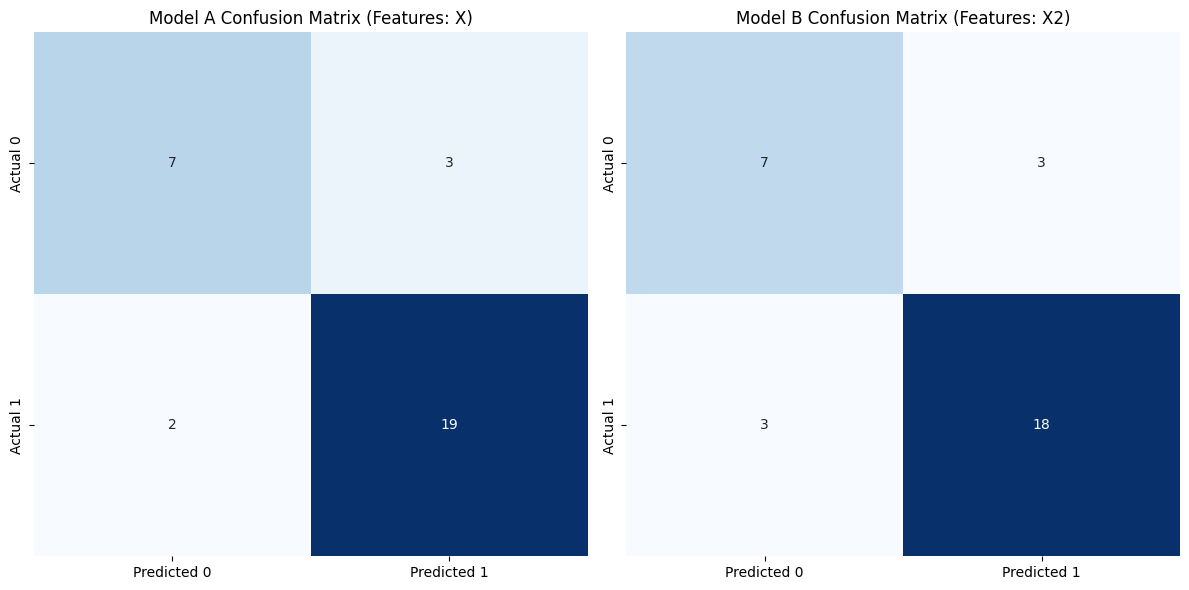

In [153]:
# prompt: help me run a confusion matrix on Model A using X as features and y as target, and on Model B using X2 as features and y as target, and display the confusion matrices side by side labeled Model A and Model B

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have already trained your models (Model A and Model B) and have predictions:
# y_pred_A: Predictions from Model A
# y_pred_B: Predictions from Model B
# y_test: True labels

# Example predictions (replace with your actual predictions)
y_pred_A = model_A.predict(X) > 0.5 # Example using model_A, adjust threshold if needed.
y_pred_B = model_B.predict(X2) > 0.5 # Example using model_B, adjust threshold if needed.

# Calculate confusion matrices
cm_A = confusion_matrix(y, y_pred_A)
cm_B = confusion_matrix(y, y_pred_B)

# Plot confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Model A Confusion Matrix
sns.heatmap(cm_A, annot=True, fmt="d", cmap="Blues", ax=axes[0],
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'],
            cbar=False)
axes[0].set_title("Model A Confusion Matrix (Features: X)")  # Set title for Model A

# Model B Confusion Matrix
sns.heatmap(cm_B, annot=True, fmt="d", cmap="Blues", ax=axes[1],
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'],
            cbar=False)
axes[1].set_title("Model B Confusion Matrix (Features: X2)")  # Set title for Model B


plt.tight_layout()
plt.show()


##7. Classification **Report**

In [154]:
from sklearn.metrics import classification_report

# Print classification reports side-by-side
print("## Model A Classification Report\n")
print(classification_report(y, y_pred_A))

print("\n## Model B Classification Report\n")  # Added newline for separation
print(classification_report(y, y_pred_B))

## Model A Classification Report

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.86      0.90      0.88        21

    accuracy                           0.84        31
   macro avg       0.82      0.80      0.81        31
weighted avg       0.84      0.84      0.84        31


## Model B Classification Report

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.86      0.86      0.86        21

    accuracy                           0.81        31
   macro avg       0.78      0.78      0.78        31
weighted avg       0.81      0.81      0.81        31



#Summary

Model A Beat Model B
(